In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 入力長

In [4]:
TIME_STEPS = 16
DIMENSION = 2

# 学習データ読み込み

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [6]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [8]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [9]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 66        
Total params: 1,108
Trainable params: 1,108
Non-trainable params: 0
_________________________________________________________________


In [10]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [11]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [12]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/32 [==============================] - 3s 20ms/step - loss: 1.7563 - accuracy: 0.2523 - val_loss: 1.7113 - val_accuracy: 0.2409

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.6773 - accuracy: 0.2762 - val_loss: 1.6245 - val_accuracy: 0.2258

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 1.5900 - accuracy: 0.3139 - val_loss: 1.5311 - val_accuracy: 0.2024

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
32/32 [==============================] - 0s 4ms/step - loss: 1.5075 - accuracy: 0.3573 - val_loss: 1.4516 - val_accuracy: 0.4789

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step -

32/32 [==============================] - 0s 3ms/step - loss: 0.7405 - accuracy: 0.7077 - val_loss: 0.5453 - val_accuracy: 0.9207

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7602 - accuracy: 0.7049 - val_loss: 0.5384 - val_accuracy: 0.9230

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7422 - accuracy: 0.7180 - val_loss: 0.5277 - val_accuracy: 0.9245

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7363 - accuracy: 0.7153 - val_loss: 0.5144 - val_accuracy: 0.9282

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.7

32/32 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7817 - val_loss: 0.3252 - val_accuracy: 0.9532

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5756 - accuracy: 0.7810 - val_loss: 0.3233 - val_accuracy: 0.9539

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5609 - accuracy: 0.7812 - val_loss: 0.3191 - val_accuracy: 0.9539

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5642 - accuracy: 0.7880 - val_loss: 0.3181 - val_accuracy: 0.9547

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5

32/32 [==============================] - 0s 4ms/step - loss: 0.5081 - accuracy: 0.8069 - val_loss: 0.2690 - val_accuracy: 0.9486

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.5082 - accuracy: 0.8134 - val_loss: 0.2669 - val_accuracy: 0.9517

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4958 - accuracy: 0.8195 - val_loss: 0.2673 - val_accuracy: 0.9532

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.8228 - val_loss: 0.2652 - val_accuracy: 0.9509

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
32/32 [==============================] - 0s 3ms/step - loss:

32/32 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.8258 - val_loss: 0.2463 - val_accuracy: 0.9547

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4774 - accuracy: 0.8253 - val_loss: 0.2456 - val_accuracy: 0.9532

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.8331 - val_loss: 0.2446 - val_accuracy: 0.9532

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4775 - accuracy: 0.8215 - val_loss: 0.2431 - val_accuracy: 0.9539

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
32/32 [==============================] - 0s 3ms/step - loss:

32/32 [==============================] - 0s 4ms/step - loss: 0.4662 - accuracy: 0.8311 - val_loss: 0.2221 - val_accuracy: 0.9569

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4591 - accuracy: 0.8321 - val_loss: 0.2219 - val_accuracy: 0.9569

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8374 - val_loss: 0.2249 - val_accuracy: 0.9577

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4517 - accuracy: 0.8341 - val_loss: 0.2256 - val_accuracy: 0.9569

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
32/32 [==============================] - 0s 3ms/step - loss:

32/32 [==============================] - 0s 3ms/step - loss: 0.4281 - accuracy: 0.8497 - val_loss: 0.2109 - val_accuracy: 0.9585

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4504 - accuracy: 0.8351 - val_loss: 0.2125 - val_accuracy: 0.9585

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
32/32 [==============================] - 0s 3ms/step - loss: 0.4419 - accuracy: 0.8404 - val_loss: 0.2120 - val_accuracy: 0.9592

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4144 - accuracy: 0.8487 - val_loss: 0.2117 - val_accuracy: 0.9607

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
32/32 [==============================] - 0s 4ms/step - loss:

32/32 [==============================] - 0s 4ms/step - loss: 0.4353 - accuracy: 0.8444 - val_loss: 0.2031 - val_accuracy: 0.9607

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4028 - accuracy: 0.8540 - val_loss: 0.2005 - val_accuracy: 0.9615

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4126 - accuracy: 0.8547 - val_loss: 0.2037 - val_accuracy: 0.9607

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
32/32 [==============================] - 0s 4ms/step - loss: 0.4132 - accuracy: 0.8484 - val_loss: 0.2007 - val_accuracy: 0.9607

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
32/32 [==============================] - 0s 4ms/step - loss:

In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[9.5742548e-01 1.2998101e-02 1.1178231e-02 1.8394295e-02 2.0162988e-06
 1.8017502e-06]
0


# 混同行列

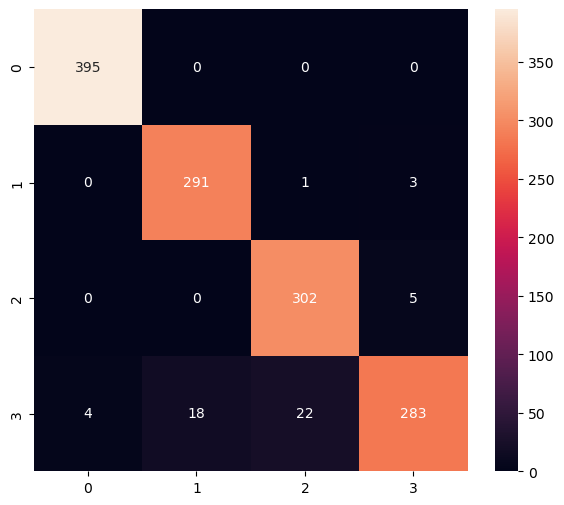

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.94      0.99      0.96       295
           2       0.93      0.98      0.96       307
           3       0.97      0.87      0.92       327

    accuracy                           0.96      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.96      0.96      0.96      1324



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [17]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [18]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\THOLE~1\AppData\Local\Temp\tmp4k2wv8w1\assets


6320

# 推論テスト

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [20]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_1', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.5750231e-01 1.2967000e-02 1.1152752e-02 1.8374113e-02 2.0164910e-06
 1.7977701e-06]
0
